In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv("exoplanet_data.csv")

In [4]:
df.head(10)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
5,CONFIRMED,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,...,-83,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
7,CONFIRMED,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,...,-78,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
8,CONFIRMED,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,...,-89,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
9,CONFIRMED,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [6]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [7]:
# Dropping all the error columns

df.drop(["koi_period_err1", "koi_period_err2", "koi_time0bk_err1", "koi_time0bk_err2", "koi_duration_err1",
              "koi_duration_err2", "koi_depth_err1", "koi_depth_err2", "koi_prad_err1", "koi_prad_err2",
              "koi_insol_err1", "koi_insol_err2", "koi_steff_err1", "koi_steff_err2","koi_slogg_err1",
              "koi_slogg_err2", "koi_srad_err1", "koi_srad_err2"], axis=1, inplace = True)

In [8]:
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_impact_err1,koi_impact_err2,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,0.059,-0.443,...,443,9.11,25.8,2,5455,4.467,0.927,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,5.126,-0.077,...,638,39.30,76.3,1,5853,4.544,0.868,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,0.115,-0.092,...,1395,891.96,505.6,1,5805,4.564,0.791,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,0.235,-0.478,...,1406,926.16,40.9,1,6031,4.438,1.046,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,172.979370,0.762,0.139,-0.532,...,1160,427.65,40.2,2,6046,4.486,0.972,296.28613,48.224670,15.714


In [9]:
# Features and target
X = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].values
y = df.iloc[:,0].values
y, class_names = pd.factorize(y)
X

array([[  0.      ,   0.      ,   0.      , ..., 291.93423 ,  48.141651,
         15.347   ],
       [  0.      ,   1.      ,   0.      , ..., 297.00482 ,  48.134129,
         15.436   ],
       [  0.      ,   1.      ,   0.      , ..., 285.53461 ,  48.28521 ,
         15.597   ],
       ...,
       [  0.      ,   0.      ,   0.      , ..., 286.50937 ,  47.163219,
         14.757   ],
       [  0.      ,   0.      ,   1.      , ..., 294.16489 ,  47.176281,
         15.385   ],
       [  0.      ,   0.      ,   1.      , ..., 297.00977 ,  47.121021,
         14.826   ]])

In [10]:
y

array([0, 1, 1, ..., 2, 1, 1], dtype=int64)

In [11]:
class_names

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

## Decision tree without fine tuning

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

In [13]:
print(len(df))
print(len(X_train))
print(len(X_test))

6991
5243
1748


>20, train: 0.989, test: 0.868


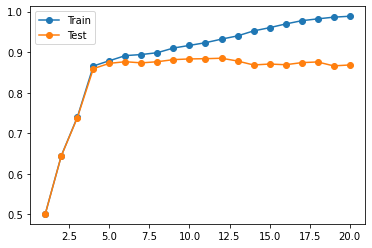

In [14]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# define lists to collect scores
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
# configure the model
    model = DecisionTreeClassifier(criterion='entropy',max_depth=i
, random_state=42)
# fit model on the training dataset
    model.fit(X_train, y_train)
# evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
# evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
# summarize progress
print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [15]:
# Slecting the max depth 4 and creating the model
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [16]:
y_pred_train = classifier.predict(X_train)

In [17]:
accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy_train

0.8659164600419607

In [18]:
# prediction on test data
y_pred_test = classifier.predict(X_test)
accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
accuracy_test

0.8592677345537757

In [19]:

print(classification_report(y_test, y_pred_test,
                            target_names=class_names))

                precision    recall  f1-score   support

     CONFIRMED       0.71      0.87      0.78       450
FALSE POSITIVE       0.98      0.97      0.97       876
     CANDIDATE       0.80      0.62      0.70       422

      accuracy                           0.86      1748
     macro avg       0.83      0.82      0.82      1748
  weighted avg       0.87      0.86      0.86      1748



In [20]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[391  10  49]
 [  8 850  18]
 [153   8 261]]


In [21]:
import seaborn as sns

Accuracy: 0.859


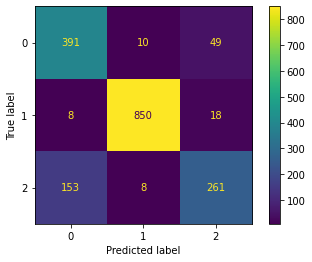

In [22]:
# confusion matrix before tuning

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_tr = confusion_matrix(y_test, y_pred_test, labels=classifier.classes_) # imported sklearn function
disp_tr = ConfusionMatrixDisplay(confusion_matrix=cm_tr, display_labels=classifier.classes_) # imported sklearn function
disp_tr.plot()
print('Accuracy: %.3f' % classifier.score(X_test, y_test))

## GridSearch CV to tune decision tree 

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {
'max_depth': [2,4,6,8,10],
'min_samples_split': [5,10,15,20]
}

In [25]:
tunner = GridSearchCV(
    DecisionTreeClassifier(random_state = 42),
    param_grid,
    cv = 5,
    verbose = 3
)

In [26]:
tunner.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..max_depth=2, min_samples_split=5;, score=0.633 total time=   0.0s
[CV 2/5] END ..max_depth=2, min_samples_split=5;, score=0.640 total time=   0.0s
[CV 3/5] END ..max_depth=2, min_samples_split=5;, score=0.645 total time=   0.0s
[CV 4/5] END ..max_depth=2, min_samples_split=5;, score=0.663 total time=   0.0s
[CV 5/5] END ..max_depth=2, min_samples_split=5;, score=0.642 total time=   0.0s
[CV 1/5] END .max_depth=2, min_samples_split=10;, score=0.633 total time=   0.0s
[CV 2/5] END .max_depth=2, min_samples_split=10;, score=0.640 total time=   0.0s
[CV 3/5] END .max_depth=2, min_samples_split=10;, score=0.645 total time=   0.0s
[CV 4/5] END .max_depth=2, min_samples_split=10;, score=0.663 total time=   0.0s
[CV 5/5] END .max_depth=2, min_samples_split=10;, score=0.642 total time=   0.0s
[CV 1/5] END .max_depth=2, min_samples_split=15;, score=0.633 total time=   0.0s
[CV 2/5] END .max_depth=2, min_samples_split=15

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [5, 10, 15, 20]},
             verbose=3)

In [27]:
tunner.best_params_

{'max_depth': 6, 'min_samples_split': 20}

In [28]:
best_model = tunner.best_estimator_

In [29]:
best_model.score(X_test, y_test)

0.8775743707093822

In [30]:
best_model.score(X_train, y_train)

0.8918558077436582

In [31]:
pred_tune = best_model.predict(X_test)

Accuracy: 0.878


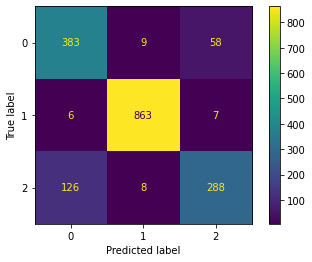

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_tr_tune = confusion_matrix(y_test, pred_tune, labels=classifier.classes_) # imported sklearn function
disp_tr_tune = ConfusionMatrixDisplay(confusion_matrix=cm_tr_tune, display_labels=classifier.classes_) # imported sklearn function
disp_tr_tune.plot()

print('Accuracy: %.3f' % best_model.score(X_test, y_test))

In [33]:
# Save the model
import joblib
filename = 'M1_Rajesh_Decision_Tree.sav'
joblib.dump(best_model, filename)

['M1_Rajesh_Decision_Tree.sav']